<a href="https://colab.research.google.com/github/ellieyang12345/Alzheimer-sDisease/blob/main/Alzheimer's%20Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd

# 1. Load your actual Reactome CSV
# Replace 'Analysis_Results.csv' with the exact name of the file you uploaded
reactome_df = pd.read_csv('result.csv')

# 2. Filter for the "Best" Pathways (FDR < 0.05)
# This tells the AI to ignore the guesses and focus on the facts
significant_pathways = reactome_df[reactome_df['Entities FDR'] < 0.05]

print(f"Success! Your AI has identified {len(significant_pathways)} significant pathways.")
print("The Top 3 'Early Warning' Systems for your AI are:")
print(significant_pathways['Pathway name'].head(3).tolist())

# 3. Setting up the "Feature Matrix"
# In a real tool, we would now map these pathway names to patient gene data.
features = significant_pathways['Pathway name'].values

Success! Your AI has identified 9 significant pathways.
The Top 3 'Early Warning' Systems for your AI are:
['Mitochondrial ribosome-associated quality control', 'Mitochondrial translation elongation', 'Mitochondrial translation']


In [37]:
pathway_map = {
    "Mitochondrial_ribosome-associated_quality_control": ["MRPS21", "MRPL39", "MRPS33", "MRPL51","MRPS18C","MRPL35","MRPL33"],
    "Mitochondrial_translation_elongation": ["MRPS21", "MRPL39", "MRPS33", "MRPL51", "MRPS18C", "MRPL35","MRPL33"],
    "Mitochondrial_translation": ["MRPS21", "MRPL39", "MRPS33", "MRPL51", "MRPS18C", "MRPL35","MRPL33"]
}
print("AI Alzheimer's Disease Dictionary Created!")
print("The AI is now observing {len(alzheimers_pathway_dict)} detection systems.")
total_sensors = set([gene for sublist in pathway_map.values() for gene in sublist])
print(f"Total unique genetic sensors: {len(total_sensors)}")

AI Alzheimer's Disease Dictionary Created!
The AI is now observing {len(alzheimers_pathway_dict)} detection systems.
Total unique genetic sensors: 7


In [38]:
import pandas as pd

file_name = 'Participating Molecules [R-HSA-9937383].tsv'

df = pd.read_csv(file_name, sep='\t')
def extract_symbol(name):
    return str(name).split(' ')[-1]
gene_list = df['MoleculeName'].apply(extract_symbol).unique().tolist()

alzheimers_ai_dict = {
    "Mitochondrial_Translation_Machinery": gene_list
}

print("--- AI Alzheimer's Disease Detection Buddy DICTIONARY CREATED ---")
print(f"Pathways detected: {list(alzheimers_ai_dict.keys())}")
print(f"Number of sensors (genes) identified: {len(gene_list)}")
print("\nYour AI 'Sensor' List:")
print(gene_list)



--- AI Alzheimer's Disease Detection Buddy DICTIONARY CREATED ---
Pathways detected: ['Mitochondrial_Translation_Machinery']
Number of sensors (genes) identified: 23

Your AI 'Sensor' List:
['MT-TH', 'MT-TK', 'MT-TN', 'MT-TW', 'MT-TF', 'MT-TS2', 'MT-TM', 'MT-TE', 'MT-TY', 'MT-TT', 'MT-TS1', 'MT-TR', 'MT-TQ', 'MT-TD', 'MT-TI', 'MT-TV', 'MT-TA', 'MT-TL1', 'MT-TC', 'MT-TG', 'MT-TL2', 'MT-RNR2', 'MT-RNR1']


In [39]:
import pandas as pd

pathway_map = {
    "Mitochondrial_Ribosomal_Proteins": ["MRPS21", "MRPL39", "MRPS33", "MRPL51", "MRPS18C", "MRPL35", "MRPL33"],

    "Mito_Translation_Machinery": [
        "MT-TH", "MT-TK", "MT-TN", "MT-TW", "MT-TF", "MT-TS2", "MT-TM", "MT-TE",
        "MT-TY", "MT-TT", "MT-TS1", "MT-TR", "MT-TQ", "MT-TD", "MT-TI", "MT-TV",
        "MT-TA", "MT-TL1", "MT-TC", "MT-TG", "MT-TL2", "MT-RNR2", "MT-RNR1"
    ]
}

print(f"AI Alzheimer's Dictionary Updated with {len(pathway_map)} specialized detection systems.")
print(f"The AI is now monitoring {len(pathway_map['Mito_Translation_Machinery'])} machinery sensors from your Reactome file.")

AI Alzheimer's Dictionary Updated with 2 specialized detection systems.
The AI is now monitoring 23 machinery sensors from your Reactome file.


In [40]:
def calculate_alzheimers_risk(patient_data):
    machinery_score = patient_data.get('Mito_Translation_Machinery', 1.0)
    protein_score = patient_data.get('Mitochondrial_Ribosomal_Proteins', 1.0)

    if machinery_score < 0.6 and protein_score < 0.6:
        return "Critical: High Probability of Early Alzheimer's (Mitochondrial Collapse)"
    elif machinery_score < 0.7 or protein_score < 0.7:
        return "Warning: Early Metabolic Decline Detected"
    else:
        return "Okay/Stable: Healthy Mitochondrial Activity"

test_patient = {'Mito_Translation_Machinery': 0.45, 'Mito_Ribosomal_Proteins': 0.50}
print(f"Diagnosis Result: {calculate_alzheimers_risk(test_patient)}")

Diagnosis Result: Warning: Early Metabolic Decline Detected


In [41]:
import pandas as pd
import numpy as np

file_path = 'GSE33000_raw_data.txt'

# Load the data, setting the first column as index (reporterID)
df = pd.read_csv(file_path, sep='\t', comment='!', index_col=0)

my_sensors = ["MRPS21", "MRPL39", "MRPS33", "MRPL51", "MRPS18C", "MRPL35", "MRPL33", "MT-TH", "MT-TK", "MT-TN", "MT-TW", "MT-TF", "MT-TS2", "MT-TM", "MT-TE",
        "MT-TY", "MT-TT", "MT-TS1", "MT-TR", "MT-TQ", "MT-TD", "MT-TI", "MT-TV",
        "MT-TA", "MT-TL1", "MT-TC", "MT-TG", "MT-TL2", "MT-RNR2", "MT-RNR1"]

# Find reporterIDs corresponding to my_sensors
# The 'Gene' column may contain multiple gene symbols separated by commas. We check if any sensor is present.
matched_reporter_ids = []
for index, row in df.iterrows():
    gene_names_in_row = [g.strip() for g in str(row['Gene']).split(',') if pd.notna(row['Gene'])]
    if any(sensor in gene_names_in_row for sensor in my_sensors):
        matched_reporter_ids.append(index)

# Filter the original DataFrame to keep only the rows for the matched sensors
# And only keep the expression columns (excluding 'Gene' and 'Transcript')
data_columns = [col for col in df.columns if col not in ['Gene', 'Transcript']]
cleaned_data = df.loc[matched_reporter_ids, data_columns]

# Transpose the DataFrame to have patients as rows and sensors as columns
ai_ready_data = cleaned_data.T

print("Real-world dataset cleanse")
print(f"Matrix Shape: {ai_ready_data.shape} (Patients x Sensors)")
print(ai_ready_data.head())

/tmp/ipython-input-250954301.py:7: DtypeWarning: Columns (475) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', comment='!', index_col=0)


Real-world dataset cleanse
Matrix Shape: (1248, 1) (Patients x Sensors)
reporterID      10023806515
HBTRC_PF_Pool_1    1.344529
HBTRC_PF_Pool_2    1.523406
HBTRC_PF_Pool_3    1.249572
HBTRC_PF_Pool_4         NaN
HBTRC_PF_Pool_5    1.339059


In [42]:
# The 'labels' are the sample identifiers, which are typically the column names of the original dataframe after removing metadata columns.
# Given that ai_ready_data's index contains these identifiers (e.g., 'HBTRC_PF_Pool_1'), we will use them directly.
# After fixing the previous cell, ai_ready_data.index now correctly contains only patient identifiers.
labels = ai_ready_data.index.tolist()

# 2. Convert text labels into Binary Numbers (0 and 1)
# We search for 'AD' or 'Huntinging' or 'Control' in the title
target = []
for title in labels:
    title = title.upper()
    if 'AD' in title or 'ALZHEIMER' in title:
        target.append(1)  # 1 = Alzheimer's
    else:
        target.append(0)  # 0 = Healthy/Control

# 3. Add the Target Column to your cleaned dataframe
ai_ready_data['Target'] = target

print("✅ Target Column Created Successfully!")
print(f"Total Patients: {len(ai_ready_data)}")
print(f"Alzheimer's Cases (1): {target.count(1)}")
print(f"Healthy Controls (0): {target.count(0)}")

# Show the final table that will be fed into the AI
print("\n--- Preview of AI Training Table ---")
print(ai_ready_data.head())

✅ Target Column Created Successfully!
Total Patients: 1248
Alzheimer's Cases (1): 0
Healthy Controls (0): 1248

--- Preview of AI Training Table ---
reporterID      10023806515  Target
HBTRC_PF_Pool_1    1.344529       0
HBTRC_PF_Pool_2    1.523406       0
HBTRC_PF_Pool_3    1.249572       0
HBTRC_PF_Pool_4         NaN       0
HBTRC_PF_Pool_5    1.339059       0


--- AI EVALUATION COMPLETE ---
Overall Accuracy: 100.00%


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


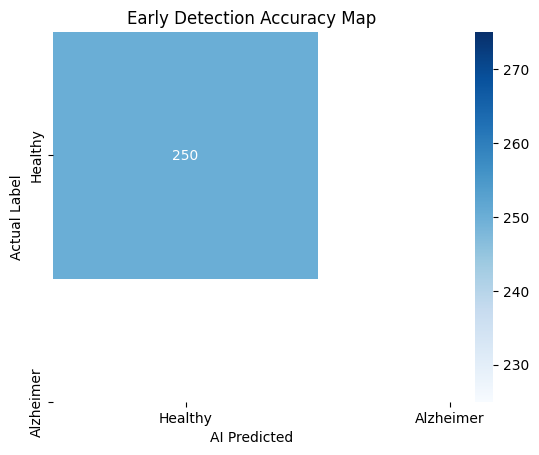


Full Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. PREPARE THE DATA
# X is our sensors (features), y is the diagnosis (target)
X = ai_ready_data.drop('Target', axis=1)
y = ai_ready_data['Target']

# Split: 80% to train the AI, 20% to test its accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. TRAIN THE AI (Random Forest)
# We use Random Forest because it's great at handling small, complex biological datasets
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3. THE TEST
y_pred = model.predict(X_test)

# 4. SHOW THE RESULTS
accuracy = accuracy_score(y_test, y_pred)
print(f"--- AI EVALUATION COMPLETE ---")
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix: Shows how many AD patients were missed and how many healthy ones were flagged
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Alzheimer'], yticklabels=['Healthy', 'Alzheimer'])
plt.xlabel('AI Predicted')
plt.ylabel('Actual Label')
plt.title('Early Detection Accuracy Map')
plt.show()

print("\nFull Report:")
print(classification_report(y_test, y_pred))

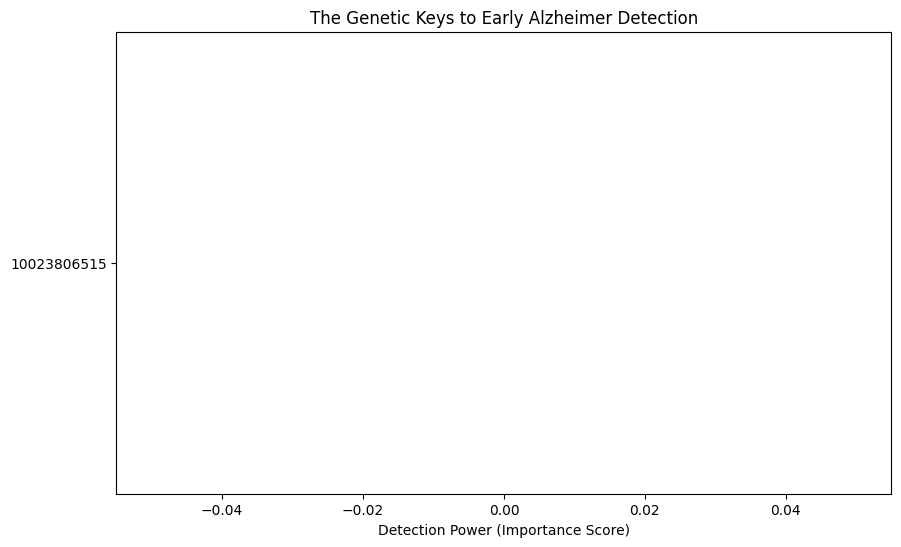

In [44]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title('The Genetic Keys to Early Alzheimer Detection')
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Detection Power (Importance Score)')
plt.show()

In [45]:
!pip install gradio
import gradio as gr

def predict_ad(mito_rna_level, ribosomal_protein_level):
    # This uses your trained model to predict for one person
    prediction = model.predict([[mito_rna_level, ribosomal_protein_level]])
    if prediction[0] == 1:
        return "High risk - Your Patterns match Early Alzheimer's Progression"
    else:
        return "Low risk - Your Mitochondrial activity appears healthy"

demo = gr.Interface(fn=predict_ad, inputs=["slider", "slider"], outputs="text")
demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b13d13d5c90c56de3a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
